# K-means clustering

# Importing libraries

In [1]:
# Import the packages that we will be using
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily

# Importing data

In [5]:
# url string that hosts our .csv file
url = "datasets/iris/iris.csv"

# Read the .csv file and store it as a pandas Data Frame
dataset = pd.read_csv(url)
dataset.columns=["Sepal_length_in_cm","Sepal_width_in_cm", "Petal_length_in_cm", "Petal_width_in_cm", "Class"]

# Undertanding and preprocessing the data

In [6]:
print(dataset.shape)

dataset.head()

(149, 5)


,Sepal_length_in_cm,Sepal_width_in_cm,Petal_length_in_cm,Petal_width_in_cm,Class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [7]:
#Drop rows with any missing values
dataset = dataset.dropna()

print(dataset.shape)

(149, 5)


In [8]:
#Encoding the class label categorical column: from string to num
# Encoding the categorical column
dataset = dataset.replace({"Class":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2} })

#Visualize the dataset
dataset

# Note: this is not neesary for the cartwheel dataset, but it going to be very usefull for the Iris dataset

,Sepal_length_in_cm,Sepal_width_in_cm,Petal_length_in_cm,Petal_width_in_cm,Class
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,2
145,6.3,2.5,5.0,1.9,2
146,6.5,3.0,5.2,2.0,2
147,6.2,3.4,5.4,2.3,2


In [9]:
#Discard columns that won't be used
# Drop out non necesary columns
dataset.drop(['Sepal_length_in_cm', 'Sepal_width_in_cm'],axis='columns',inplace=True)

#Visualize the dataset
dataset

,Petal_length_in_cm,Petal_width_in_cm,Class
0,1.4,0.2,0
1,1.3,0.2,0
2,1.5,0.2,0
3,1.4,0.2,0
4,1.7,0.4,0
...,...,...,...
144,5.2,2.3,2
145,5.0,1.9,2
146,5.2,2.0,2
147,5.4,2.3,2


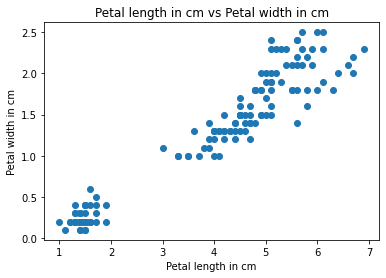

In [10]:
#Scatter plot of the data
plt.scatter(dataset.Petal_length_in_cm,dataset.Petal_width_in_cm)
plt.title('Petal length in cm vs Petal width in cm')
plt.xlabel('Petal length in cm')
plt.ylabel('Petal width in cm')
plt.show()

<ipython-input-11-0d262f591eaa>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1.Petal_length_in_cm, df1.Petal_width_in_cm, Label='Class 0')
<ipython-input-11-0d262f591eaa>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2.Petal_length_in_cm, df2.Petal_width_in_cm, Label='Class 1')
<ipython-input-11-0d262f591eaa>:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df3.Petal_length_in_cm, df3.Petal_width_in_cm, Label='Class 2')


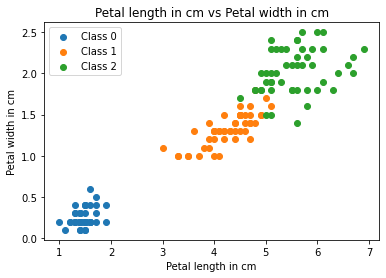

In [11]:
#Scatter plot of the data asigning each point to the cluster it belongs to ¡¡
df1 = dataset[dataset.Class==0]
df2 = dataset[dataset.Class==1]
df3 = dataset[dataset.Class==2]

plt.scatter(df1.Petal_length_in_cm, df1.Petal_width_in_cm, Label='Class 0')
plt.scatter(df2.Petal_length_in_cm, df2.Petal_width_in_cm, Label='Class 1')
plt.scatter(df3.Petal_length_in_cm, df3.Petal_width_in_cm, Label='Class 2')

plt.title('Petal length in cm vs Petal width in cm')
plt.xlabel('Petal length in cm')
plt.ylabel('Petal width in cm')
plt.legend()
plt.show()

# Kmeans clustering

In [21]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
km = KMeans(n_clusters=3)

# Do K-means clustering (assing each point in the dataset to a cluster)
yp = km.fit_predict(dataset[['Petal_length_in_cm','Petal_width_in_cm']])

# Print estimated cluster of each point in the dataser
yp

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [22]:
# Add a new column to the dataset with the cluster information
dataset['Cluster1'] = yp

# Visualize the dataset
dataset

,Petal_length_in_cm,Petal_width_in_cm,Class,Cluster1
0,1.4,0.2,0,1
1,1.3,0.2,0,1
2,1.5,0.2,0,1
3,1.4,0.2,0,1
4,1.7,0.4,0,1
...,...,...,...,...
144,5.2,2.3,2,0
145,5.0,1.9,2,0
146,5.2,2.0,2,0
147,5.4,2.3,2,0


In [23]:
# Visualize the ID of the clusters
dataset.Cluster1.unique()

array([1, 2, 0])

In [24]:
# Center of each cluster
km.cluster_centers_

array([[5.59583333, 2.0375    ],
       [1.46326531, 0.24693878],
       [4.26923077, 1.34230769]])

In [25]:
# Sum of squared error
km.inertia_

31.3652773417059

# Plot estimated clusters

<ipython-input-27-9916d0114d2b>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1.Petal_length_in_cm, df1.Petal_width_in_cm, Label='Estimated Class 1')
<ipython-input-27-9916d0114d2b>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2.Petal_length_in_cm, df2.Petal_width_in_cm, Label='Estimated Class 2')
<ipython-input-27-9916d0114d2b>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df3.Petal_length_in_cm, df3.Petal_width_in_cm, Label='Estimated Class 3')


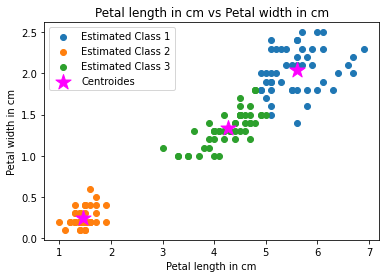

In [27]:
df1 = dataset[dataset.Cluster1==0]
df2 = dataset[dataset.Cluster1==1]
df3 = dataset[dataset.Cluster1==2]

plt.scatter(df1.Petal_length_in_cm, df1.Petal_width_in_cm, Label='Estimated Class 1')
plt.scatter(df2.Petal_length_in_cm, df2.Petal_width_in_cm, Label='Estimated Class 2')
plt.scatter(df3.Petal_length_in_cm, df3.Petal_width_in_cm, Label='Estimated Class 3')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='magenta', marker='*', label='Centroides', s=256)

plt.title('Petal length in cm vs Petal width in cm')
plt.xlabel('Petal length in cm')
plt.ylabel('Petal width in cm')
plt.legend()
plt.show()

<ipython-input-28-0d262f591eaa>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1.Petal_length_in_cm, df1.Petal_width_in_cm, Label='Class 0')
<ipython-input-28-0d262f591eaa>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2.Petal_length_in_cm, df2.Petal_width_in_cm, Label='Class 1')
<ipython-input-28-0d262f591eaa>:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df3.Petal_length_in_cm, df3.Petal_width_in_cm, Label='Class 2')


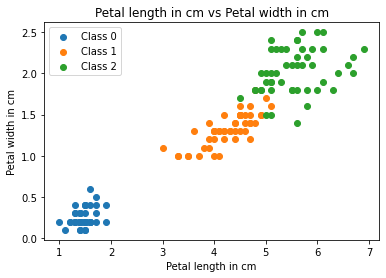

In [28]:
#Scatter plot of the data asigning each point to the cluster it belongs to ¡¡
df1 = dataset[dataset.Class==0]
df2 = dataset[dataset.Class==1]
df3 = dataset[dataset.Class==2]

plt.scatter(df1.Petal_length_in_cm, df1.Petal_width_in_cm, Label='Class 0')
plt.scatter(df2.Petal_length_in_cm, df2.Petal_width_in_cm, Label='Class 1')
plt.scatter(df3.Petal_length_in_cm, df3.Petal_width_in_cm, Label='Class 2')

plt.title('Petal length in cm vs Petal width in cm')
plt.xlabel('Petal length in cm')
plt.ylabel('Petal width in cm')
plt.legend()
plt.show()

# Selecting K: elbow plot

In [ ]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit_predict(dataset[['Petal_length_in_cm','CWDistance']])
    sse.append(km.inertia_)